# Principle Component Analysis (PCA) Example

### Main contents:
1. PCA for Data Visualization
2. PCA to Speed-up Machine Learning Algorithms

## 1. PCA for Data Visualization

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

### 1.1. Load Iris Dataset

The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [56]:
import pandas as pd
from sklearn.datasets import load_iris


df_bunch = load_iris()
features = df_bunch.feature_names
target_names = df_bunch.target_names
print(type(df_bunch))
print(df_bunch.feature_names)
print(df_bunch.target)
print(df_bunch.target_names)
df = pd.DataFrame(data=df_bunch.data,columns=df_bunch.feature_names)
df['target'] = df_bunch.target
df['target_names'] = df['target']
i = 0
for t in df_bunch.target:    
    df['target_names'][i] = target_names[t]
    i+=1
    
print(df[:5])

<class 'sklearn.datasets.base.Bunch'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


In [23]:
# print(df.feature_names)
# print(df.data[:5])
# print(df.target[:5])

### 1.2. Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [57]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, features].values
print(x[:5])

# Separating out the target
y = df.loc[:,['target']].values
print(y[:5])

# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x[:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[0]
 [0]
 [0]
 [0]
 [0]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### 1.3. PCA Projection to 2D

The original data has 4 columns **_(sepal length, sepal width, petal length, and petal width)_**. In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [65]:
# Get the final dataframe
final_df = pd.concat([principalDf, df[['target']], df[['target_names']]], axis=1)
final_df.head()

,PC1,PC2,target,target_names
0,-2.264542,0.505704,0,setosa
1,-2.086426,-0.655405,0,setosa
2,-2.367950,-0.318477,0,setosa
3,-2.304197,-0.575368,0,setosa
4,-2.388777,0.674767,0,setosa


In [67]:
final_df.head()

,PC1,PC2,target,target_names
0,-2.264542,0.505704,0,setosa
1,-2.086426,-0.655405,0,setosa
2,-2.367950,-0.318477,0,setosa
3,-2.304197,-0.575368,0,setosa
4,-2.388777,0.674767,0,setosa


### 1.4. Visualize 2D projection

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

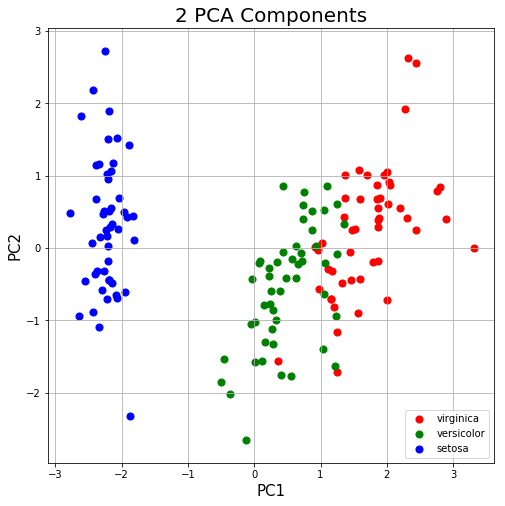

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('2 PCA Components', fontsize=20)

targets = set(df.target_names)
# print(targets)
# print(targets)
colors = ['r','g','b']
for target, color in zip(targets, colors):
#     print(target, ':', final_df['target_names'],'\n')
    indicesToKeep = final_df['target_names'] == target
#     print(indicesToKeep)
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'],
              final_df.loc[indicesToKeep, 'PC2'],
              c= color,
              s = 50)
ax.legend(targets)
ax.grid()

### 1.5. Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute **explained_variance_ratio__**, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [80]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

## 2. PCA to Speed-up Machine Learning Algorithms

One of the most important applications of PCA is for speeding up machine learning algorithms. We are using MNIST database for more practical here.

The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.


### 2.1. Download and Load the Data

You can fetch_mldata to get MNIST data.

In [82]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

The iamges that we downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70000 images with 784 dimensions (features) here.

The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

### 2.2. Split data into Training and Test sets

We split by 80:20 rate.

In [83]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

### 2.3. Standardize the data

We are using **StandardScaler** to standardize the data.

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only training set
scaler.fit(train_img)

# Apply transform for both training set and test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### 2.4. Import and Apply PCA

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [86]:
from sklearn.decomposition import PCA

# make an instance of the Model
pca = PCA(0.95)

# Fit PCA on training set
pca.fit(train_img)

# Note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

# Apply the mapping (transform) to both the training set and the test set
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### 2.5. Apply Logistic Regression to the Transformed Data

In [88]:
# Step 1: Import the model you want to use
from sklearn.linear_model import LogisticRegression

# Step 2: Make an instance of the Model
regression = LogisticRegression(solver='lbfgs')

# Step 3: Training the model on the data, storing the information learned from the data
regression.fit(train_img, train_lbl)

# Step 4: Predict for one observation (image)
y_pred = regression.predict(test_img)
y_pred

array([ 1.,  9.,  2., ...,  1.,  5.,  4.])

**Calculate the accuracy**

In [95]:
from sklearn.metrics import accuracy_score, f1_score
score = accuracy_score(test_lbl, y_pred)
print('accuracy score: ', score)
f1score = f1_score(test_lbl, y_pred, average='micro')
print('f1-score: ',f1score)

accuracy score:  0.918857142857
f1-score:  0.918857142857


### Note: The source of this tutorial you can find [here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).